In [2]:
library(cpop)
library(ggplot2)

Loading required package: crops

Loading required package: pacman


Attaching package: ‘cpop’


The following object is masked from ‘package:changepoint’:

    show


The following objects are masked from ‘package:stats’:

    fitted, simulate


The following object is masked from ‘package:methods’:

    show




## Section 3.1

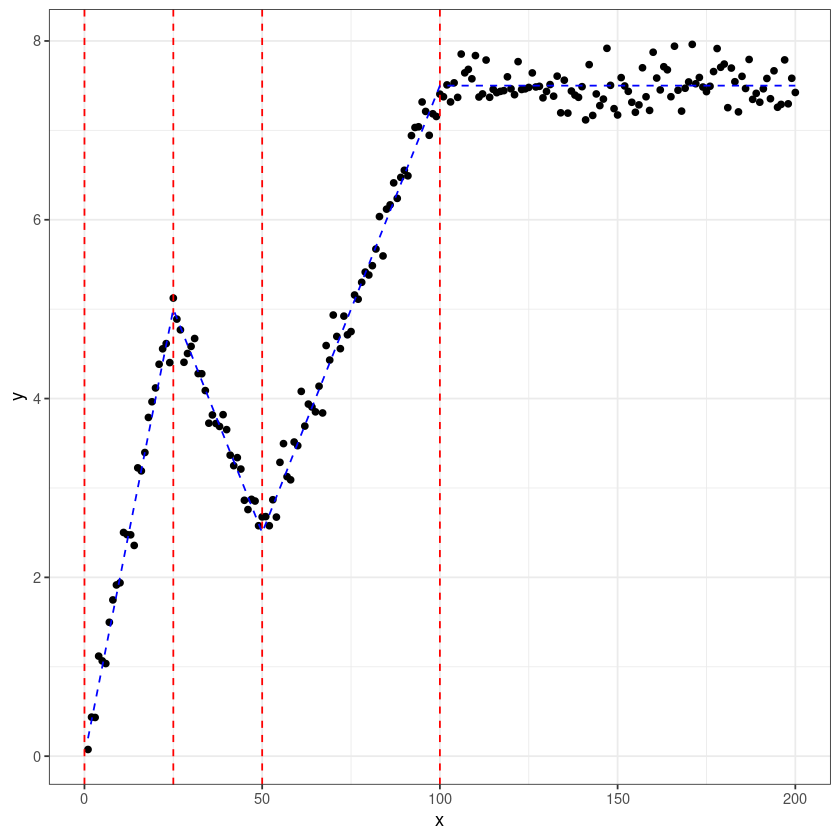

In [11]:
set.seed(1)
library("cpop")
library("ggplot2")
changepoints <- c(0, 25, 50, 100)
change.slope <- c(0.2, -0.3, 0.2, -0.1)
x <- 1:200
sd <- 0.2
y <- simulate(x, changepoints, change.slope, sd)
df <- data.frame("x" = x, "y" = y)
p <- ggplot(data = df, aes(x = x, y = y))
p <- p + geom_point()
p <- p + geom_vline(xintercept = changepoints,color = "red",linetype = "dashed")


mu <- simulate(x, changepoints, change.slope,sd = 0)
# add the true mean to the plot
p <- p + geom_line(aes(y = mu), color = "blue",linetype="dashed")


p <- p + theme_bw()
print(p)

In [12]:
library(ggplot2)
ggsave("simulate-example.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



## Section 3.2

[1] "Maximum number of runs of algorithm = 15"
[1] "Completed runs = 2"
[1] "Completed runs = 3"
[1] "Completed runs = 5"
[1] "Completed runs = 7"
[1] "Completed runs = 9"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


[1] 17

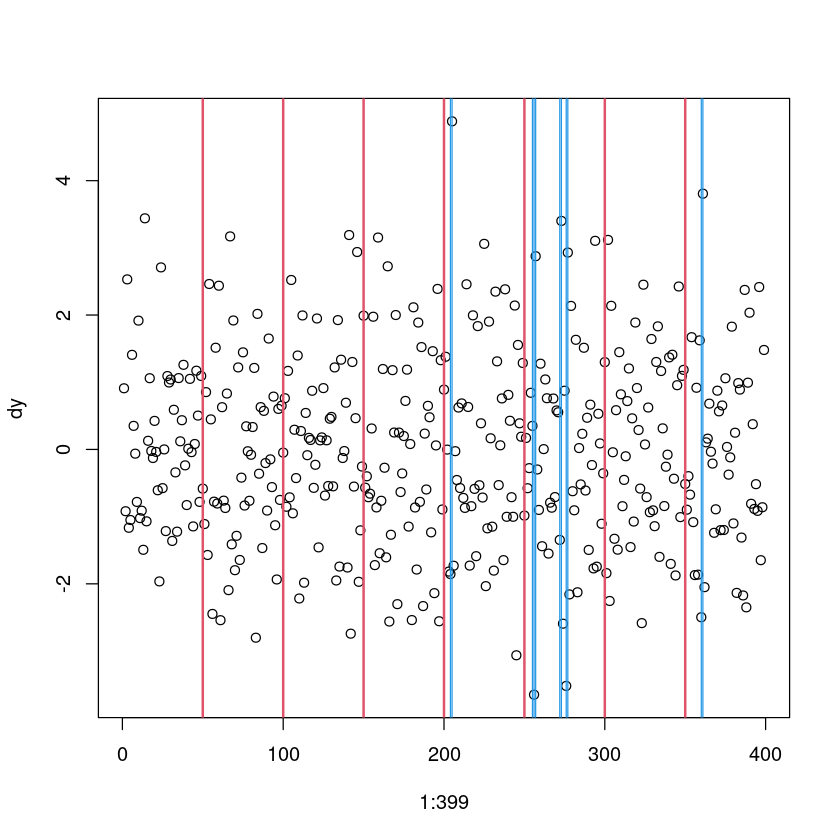

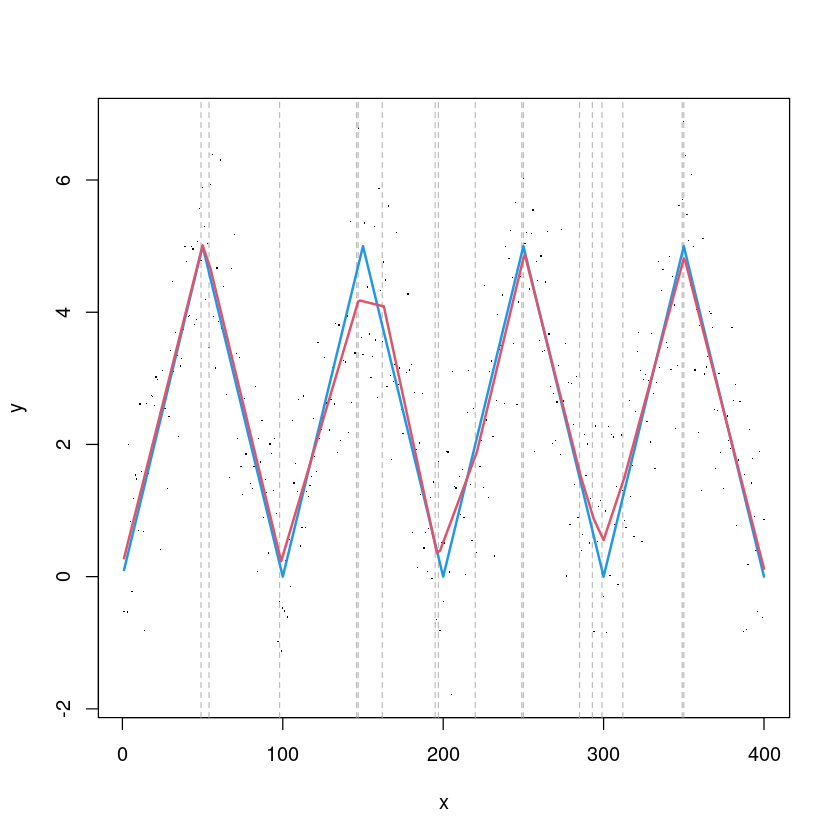

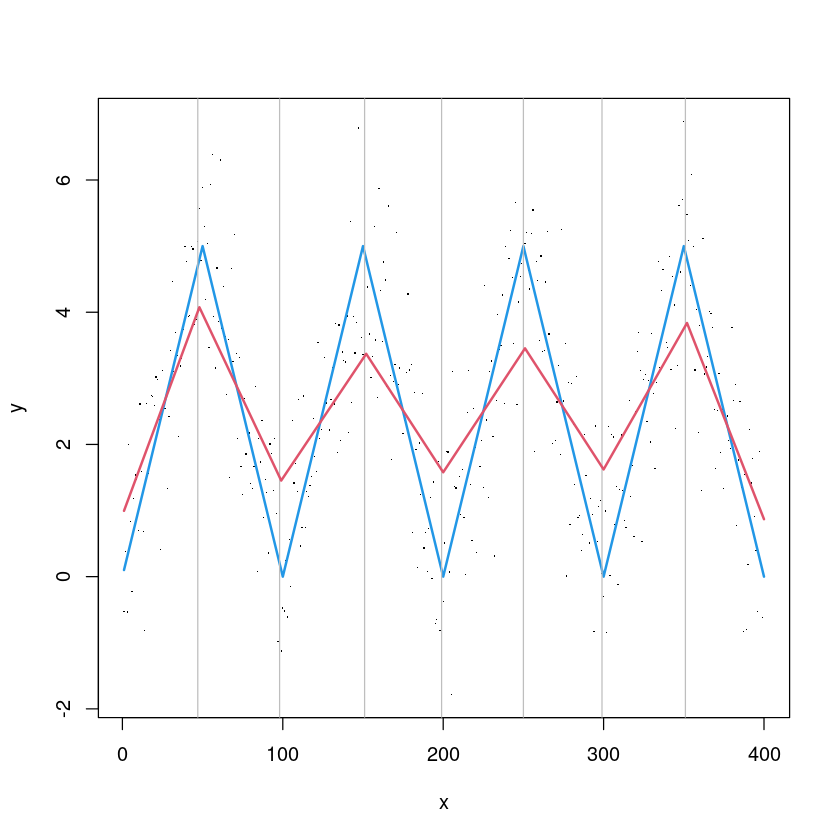

In [7]:
set.seed(1)
x <- 1:400
y <- simulate(x,changepoints = 0:7*50,change.slope = c(0.5, (-1)^(1:7))/5)
mu <- simulate(x,changepoints = 0:7*50,change.slope = c(0.5, (-1)^(1:7))/5,sd = 0)
res <- cpop(y)


##difference data
library(changepoint)
dy <- diff(y)
out <- cpt.mean(dy,method="PELT",penalty="CROPS",pen.value=c(1*log(399),2*2*log(399)))

##with default parameters -- no changes detected -- not sure if this code needs 
##to do in the paper -- just the plot
#jpeg("sec.3.2.plot.1.jpeg")
plot(1:399,dy)
abline(v=1:7*50,lwd=2,col=2) ##true changes
abline(v=cpts.full(out)[3,],col=4) ##cpt.mean with (closest to the correct) number of changes
#dev.off()

##trend filtering plot
library(genlasso)
out <- trendfilter(y, x, ord = 1)
cv <- cv.trendfilter(out)

##NOT SURE THE FOLLOWING PLOTS NEED TO BE IN PAPER.
fit1 <- out$fit[,out$lambda == cv$lambda.min]
sum(abs(diff(diff(fit1))) > 0.001) ##17 changes
#jpeg("sec.3.2.plot.2.jpeg")
plot(x,y,pch=".")
abline(v=(1:399)[abs(diff(diff(fit1)))>0.001],col="grey",lty=2)
lines(x,mu,col=4,lwd=2)
lines(x,fit1,col=2,lwd=2)
#dev.off()

cps <- rep(NA,dim(out$fit)[2])
for(i in 1:dim(out$fit)[2])
{
  cps[i] <- sum(abs(diff(diff(out$fit[,i]))) > 0.001)
}

# jpeg("sec.3.2.plot.3.jpeg")
plot(x,y,pch=".")
lines(x,mu,col=4,lwd=2)
j=38
fit2=out$fit[,j]
abline(v=(1:399)[abs(diff(diff(fit2)))>0.001],col="grey")
lines(x,fit2,col=2,lwd=2)
# dev.off()

In [8]:
c(0.5, (-1)^(1:7))/5

[1]  0.1 -0.2  0.2 -0.2  0.2 -0.2  0.2 -0.2

## section 3.2 - ggplot version

In [1]:
library(changepoint)
set.seed(1)
x=1:400
y=simulate(x,changepoints=0:7*50,change.slope=c(0.5,(-1)^(1:7))/5)
mu=simulate(x,changepoints=0:7*50,change.slope=c(0.5,(-1)^(1:7))/5,sd=0)

res=cpop(y)
##difference data
dy=diff(y)
out=cpt.mean(dy,method="PELT",penalty="CROPS",pen.value=c(1*log(399),2*2*log(399)))

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.



ERROR: Error in UseMethod("simulate"): no applicable method for 'simulate' applied to an object of class "c('integer', 'numeric')"


## Section 4.1

### Example for non-uniform grid locations

#### notes from PF

(i) Perhaps use simulate to simulate the data  \
(ii) also I would explicitly simulate new data for the non-uniform grid

#### notes from DG

(i) Used default value for sd \
(ii) Added some comments \
(iii) Added true mean to the plot. Note - the plot function returns a ggplot object which can be extended/modified by the user.


In [21]:
# simulate data with change in gradient
set.seed(1)
x <- (1:50/5)^2
changepoints <- c(10,50)
change.slope <- c(0.25,-0.25)
sd <- 1
y <- simulate(x,changepoints,change.slope,sd)


cpop analysis with n = 50 and penalty (beta)  = 7.824046

2  changepoints detected at x = 
 7.84 51.84
fitted values : 
     x0         y0     x1         y1     gradient intercept       RSS
1  0.04  0.2437026   7.84 -0.1192688 -0.046534798  0.245564  8.360422
2  7.84 -0.1192688  51.84 10.0228220  0.230502065 -1.926405 18.430750
3 51.84 10.0228220 100.00 10.3279232  0.006335159  9.694407  4.951217

overall RSS = 31.74239
cost = 47.39048



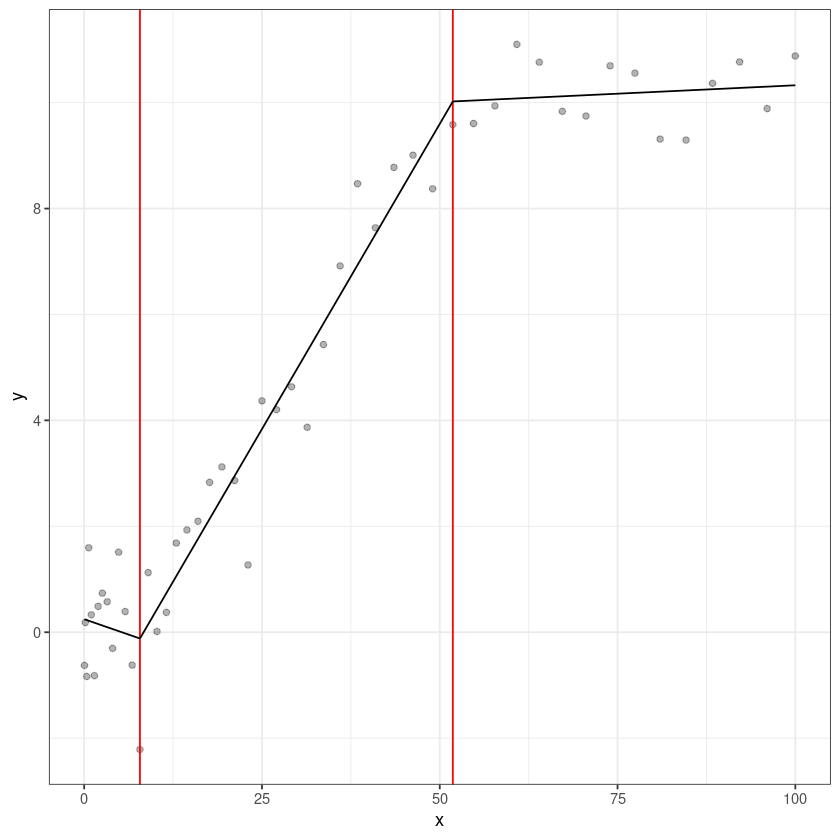

In [22]:
res <- cpop(y,x)
p <- plot(res)
print(p)
summary(res)

In [15]:
library(ggplot2)
ggsave("non-uniform-grid-locations.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



In [7]:
cost(res)


[1] 47.39048

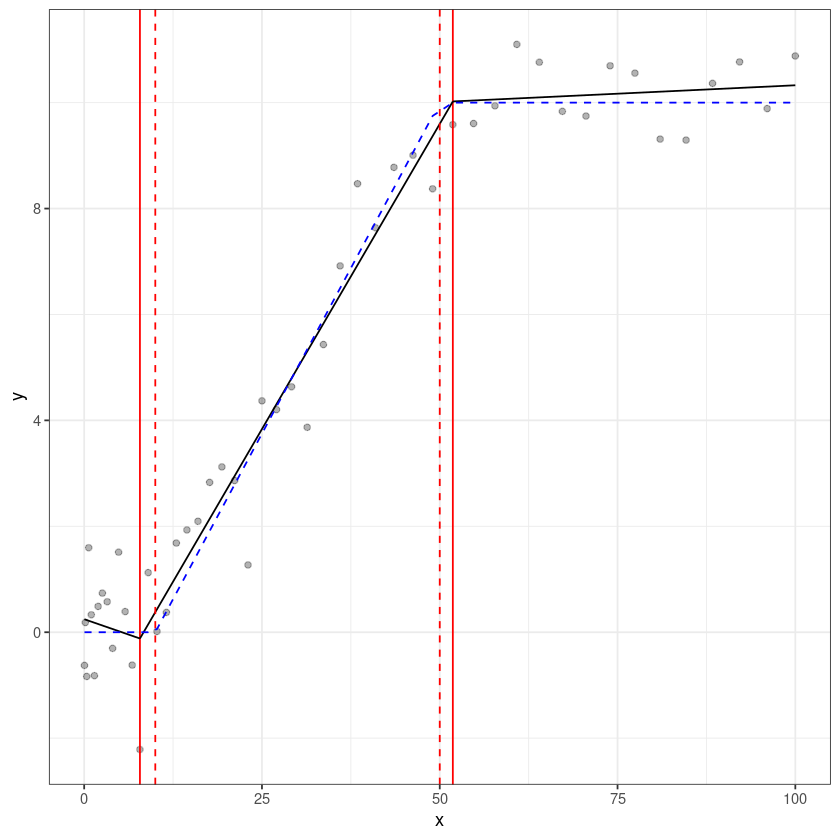

In [23]:
p <- plot(res)
# generate the "true" mean
mu <- simulate(x,changepoints,change.slope,sd=0)
# add the true mean to the plot
library(ggplot2)
p <- p + geom_vline(xintercept = changepoints,color = "red",linetype = "dashed")
p <- p + geom_line(aes(y = mu), color = "blue", linetype = "dashed")
print(p)

In [9]:
library(ggplot2)
ggsave("non-uniform-grid-locations-true-mean.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



In [25]:
print(changepoints(res))

  location
1     7.84
2    51.84


In [26]:
print(cost(res))

[1] 47.39048


In [29]:
print(head(estimate(res)))

     x     y_hat
1 0.04 0.2437026
2 0.16 0.2381184
3 0.36 0.2288114
4 0.64 0.2157817
5 1.00 0.1990292
6 1.44 0.1785539


In [31]:
print(fitted(res))

     x0         y0     x1         y1     gradient intercept       RSS
1  0.04  0.2437026   7.84 -0.1192688 -0.046534798  0.245564  8.360422
2  7.84 -0.1192688  51.84 10.0228220  0.230502065 -1.926405 18.430750
3 51.84 10.0228220 100.00 10.3279232  0.006335159  9.694407  4.951217


In [34]:
print(head(residuals(res)))

            [,1]
[1,] -0.87015639
[2,] -0.05447508
[3,] -1.06444006
[4,]  1.37949910
[5,]  0.13047860
[6,] -0.99902225


## Section 4.2

### Example with heterogeneous data

In [11]:
set.seed(1)
sd <- (1:50)/25
y <- simulate(x,changepoints=c(10,50),change.slope=c(0.25,-0.25),sd=sd)

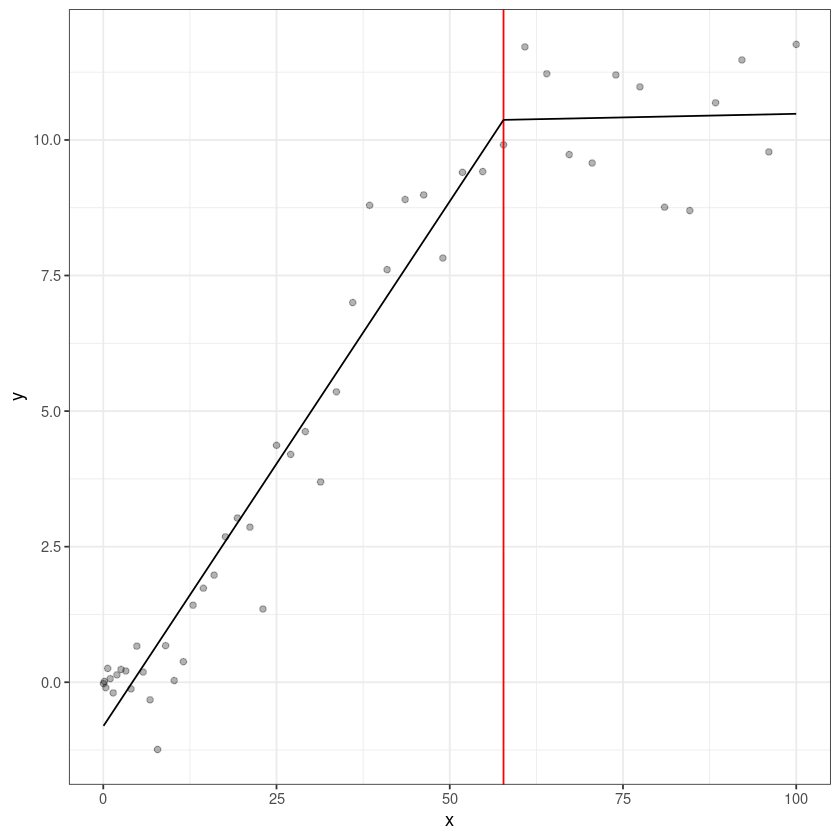

In [12]:
# analysis assuming constant noise standard deviation
res <- cpop(y,x,beta=2*log(length(y)),sd=sqrt(mean(sd^2)))
p <- plot(res)
print(p)

In [13]:
library(ggplot2)
ggsave("heterogeneous-data-constant-sd.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



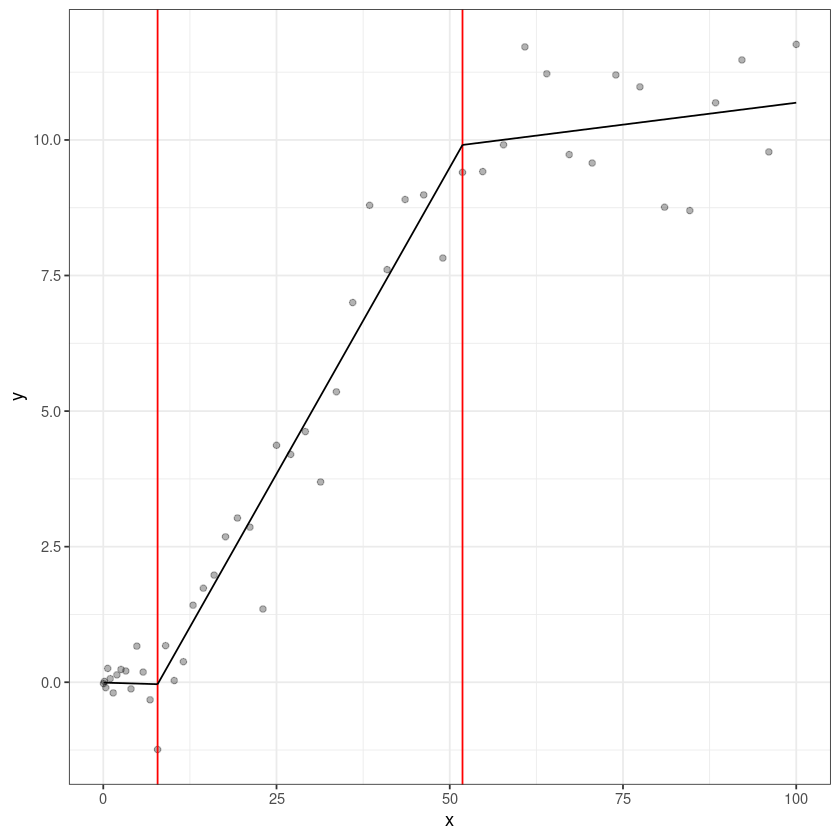

In [14]:
# analysis with the true noise standard deviation
res.true <- cpop(y,x,beta=2*log(length(y)),sd=sd)
p <- plot(res.true)
print(p)

In [15]:
library(ggplot2)
ggsave("heterogeneous-data-true-sd.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



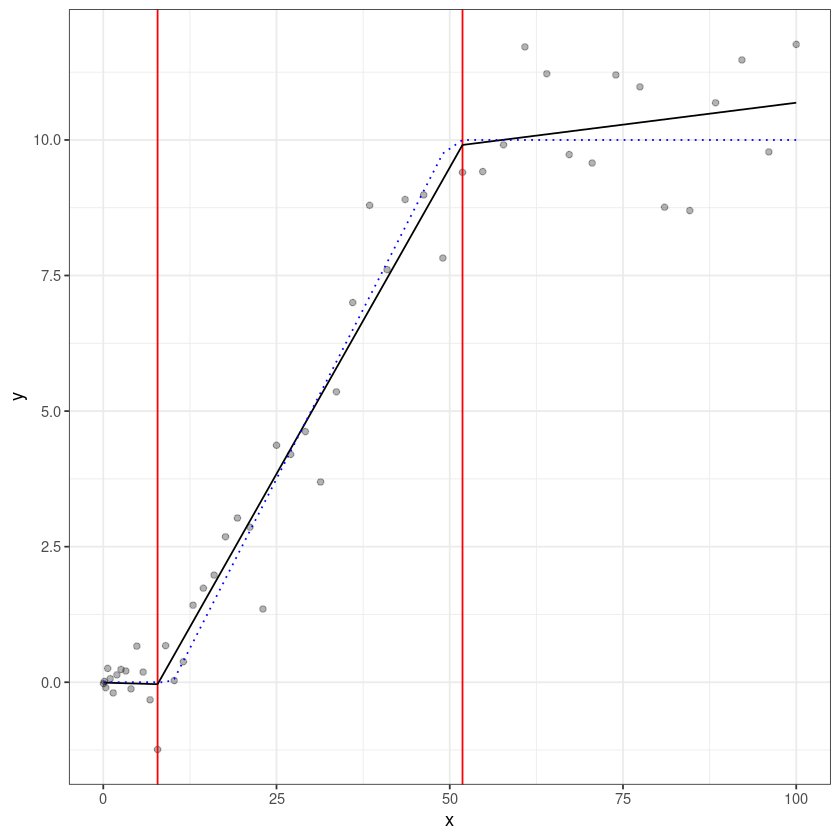

In [16]:
# add the true mean to the plot
p <- p + geom_line(aes(y = mu), color = "blue", linetype = "dotted")
print(p)

In [17]:
library(ggplot2)
ggsave("heterogeneous-data-true-sd-true-mean.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



## Section  4.3

### Choice of grid

####  Simulation study - code snippets not for paper

In [16]:
set.seed(1)
n.st=200*2^(0:5)
##scenario 1 -- one changepoint
K=10 ##number of replications
time1=matrix(NA,nrow=K,ncol=length(n.st))
time1g=matrix(NA,nrow=K,ncol=length(n.st))
for(i in 1:length(n.st)){
  n=n.st[i]
  for(k in 1:K){
    y=simulate(1:n,n/2,0.5,1)
    time1[k,i]=(system.time(cpop(y)))[1]
    time1g[k,i]=(system.time(cpop(y,grid=(1:n.st[1])*(n/n.st[1]))))[1]
    }
}

In [17]:
n.st=200*2^(0:5)
##scenario 2 -- linear increasing changepoint
K=10 ##number of replications
time2=matrix(NA,nrow=K,ncol=length(n.st))
time2g=matrix(NA,nrow=K,ncol=length(n.st))
for(i in 1:length(n.st)){
  n=n.st[i]
  for(k in 1:K){
    m=2*n/n.st[1]
    y=simulate(1:n,0:(m-1)*n/m,c(0.05,0.1*(-1)^(1:(m-1))),1)
    time2[k,i]=(system.time(cpop(y)))[1]
    time2g[k,i]=(system.time(cpop(y,grid=(1:n.st[1])*(n/n.st[1]))))[1]
  }
}

In [18]:
save(time1,time2,time1g,time2g,file="./sim.Rdata")

In [19]:
t1=apply(time1,2,mean);v1=apply(time1,2,var)
t2=apply(time2,2,mean);v2=apply(time2,2,var)
t1g=apply(time1g,2,mean);v1g=apply(time1g,2,var)
t2g=apply(time2g,2,mean);v2g=apply(time2g,2,var)
min1=apply(time1,2,min);max1=apply(time1,2,max)
min1g=apply(time1g,2,min);max1g=apply(time1g,2,max)
min2=apply(time2,2,min);max2=apply(time2,2,max)
min2g=apply(time2g,2,min);max2g=apply(time2g,2,max)

#### Example Figure For Paper-- Log-log plot of CPU vs n; with error bars

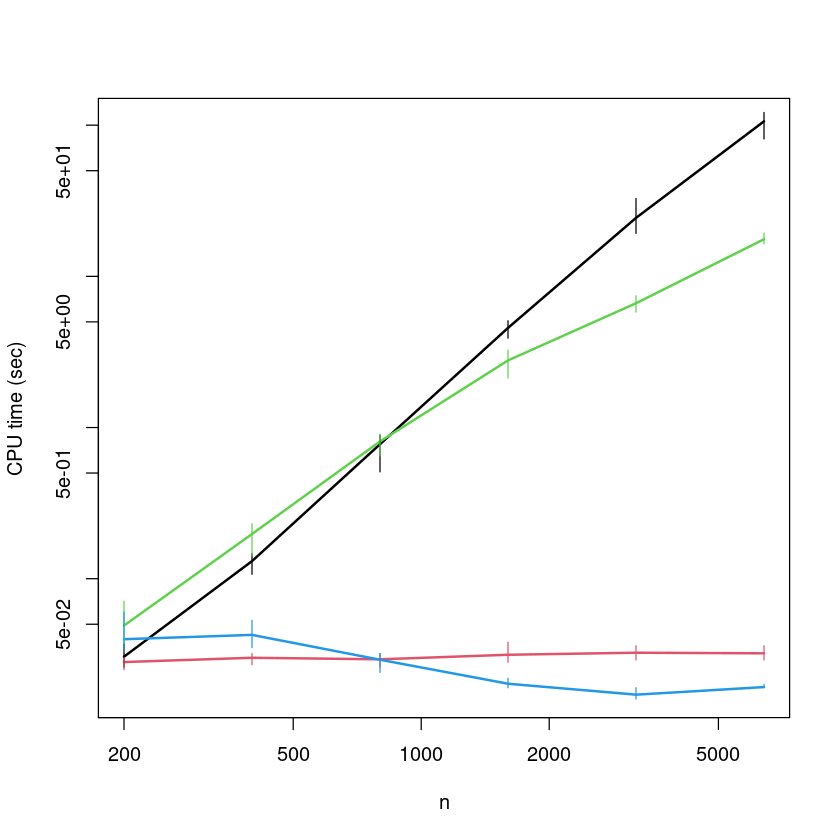

In [20]:
plot(n.st,t1,type="l",lwd=2,log="xy",ylab="CPU time (sec)",xlab="n",ylim=c(min(t2g),max(t1)))
lines(n.st,t1g,pch="x",col=2,lwd=2)
lines(n.st,t2,pch="x",col=3,lwd=2)
lines(n.st,t2g,pch="x",col=4,lwd=2)
for(i in 1:length(n.st)){
  lines(c(n.st[i],n.st[i]),c(min1[i],max1[i]),col=1)
  lines(c(n.st[i],n.st[i]),c(min1g[i],max1g[i]),col=2)
  lines(c(n.st[i],n.st[i]),c(min2[i],max2[i]),col=3)
  lines(c(n.st[i],n.st[i]),c(min2g[i],max2g[i]),col=4)
}

In [21]:
lm(log(t1)~log(n.st))
lm(log(t2)~log(n.st))
lm(log(t1g)~log(n.st))
lm(log(t2g)~log(n.st))


Call:
lm(formula = log(t1) ~ log(n.st))

Coefficients:
(Intercept)    log(n.st)  
     -16.28         2.40  



Call:
lm(formula = log(t2) ~ log(n.st))

Coefficients:
(Intercept)    log(n.st)  
    -11.785        1.698  



Call:
lm(formula = log(t1g) ~ log(n.st))

Coefficients:
(Intercept)    log(n.st)  
    -3.7695       0.0398  



Call:
lm(formula = log(t2g) ~ log(n.st))

Coefficients:
(Intercept)    log(n.st)  
    -1.6867      -0.2779  


#### Show Accuracy Of Grid

In [22]:
set.seed(1)
n <- 1000
m <- 9
cps=sample(1:99,size=m,replace=F)*10+5
y=simulate(1:n,c(0,cps),c(0.05,0.1*(-1)^(1:m)),1)

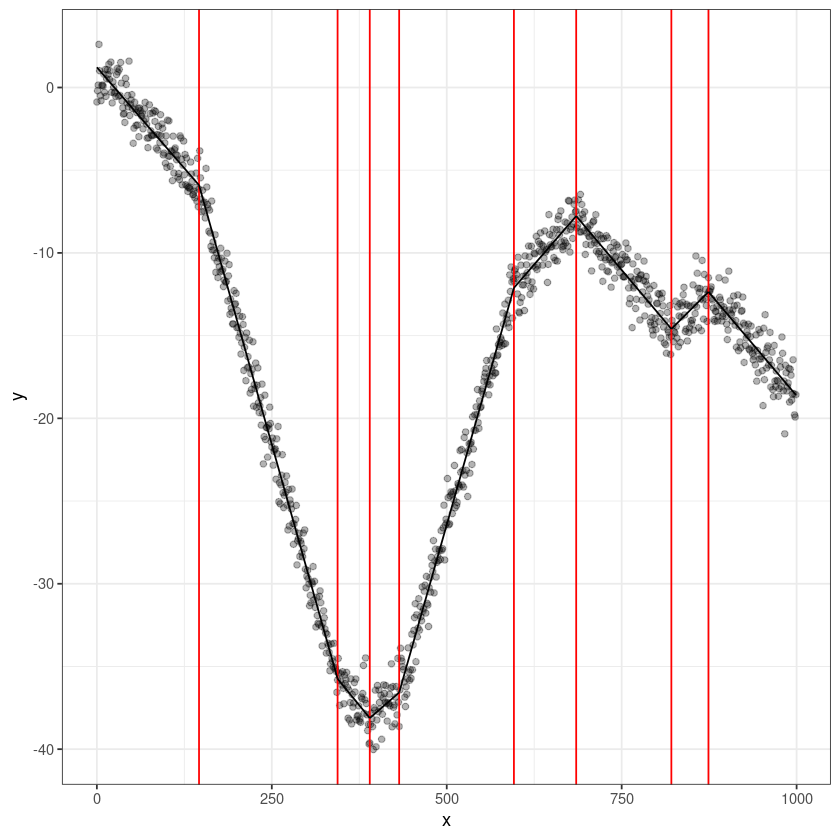

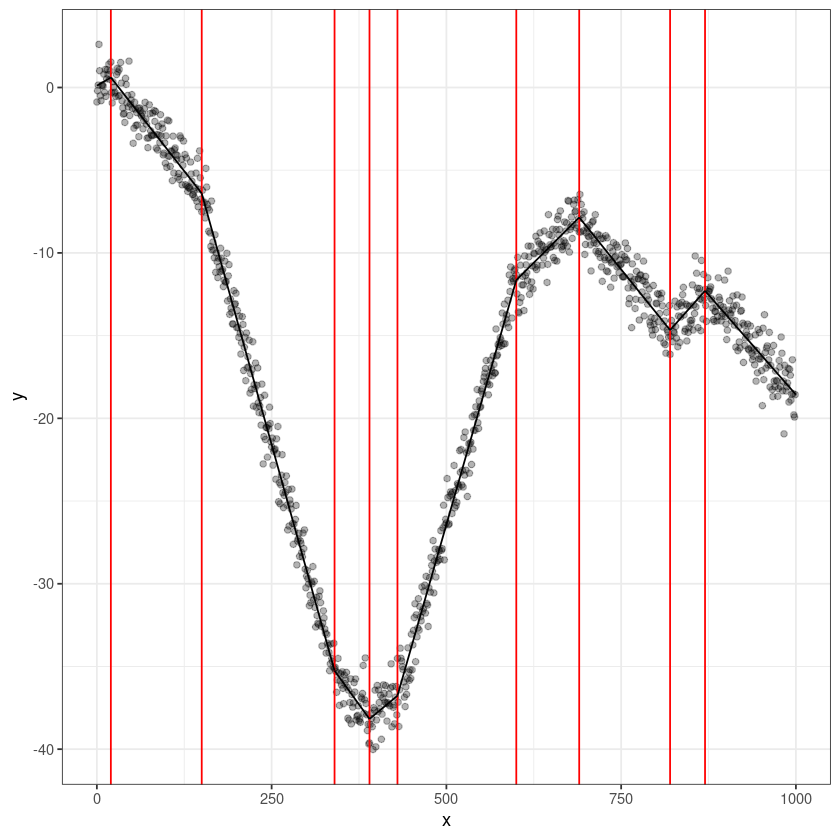

In [23]:
res=cpop(y,beta=2*log(length(y))) 
plot(res)
grid=1:100*10
res.grid=cpop(y,grid=grid,beta=2*log(length(grid)))
plot(res.grid) ##Ideally overlay estimates on the same plot as res.

In [24]:
cps.est=changepoints(res.grid)$location
adaptive.grid=NULL
for(i in 1:length(cps.est)) adaptive.grid=c(adaptive.grid,cps.est[i]+(-4):5)
res.adaptive.grid=cpop(y,grid=adaptive.grid,beta=2*log(length(y)))

#### notes - PF

Can we overlay plots -- e.g. estimate of res/res.grid on one plot

Here the results for res.adaptive.grid and res are almost identical except that the 
formere has a change at 685 and the latter at 686.


In [25]:
##compare changepoint estimates with the full
changepoints(res)$location
changepoints(res.adaptive.grid)$location

[1] 146 344 390 432 596 685 821 874

[1] 146 344 390 432 596 686 821 874

In [26]:
##2nd advantage is that you can have a more even grid
index=c(1:100,100+18*1:50)
x=index
y.sub=y[index]

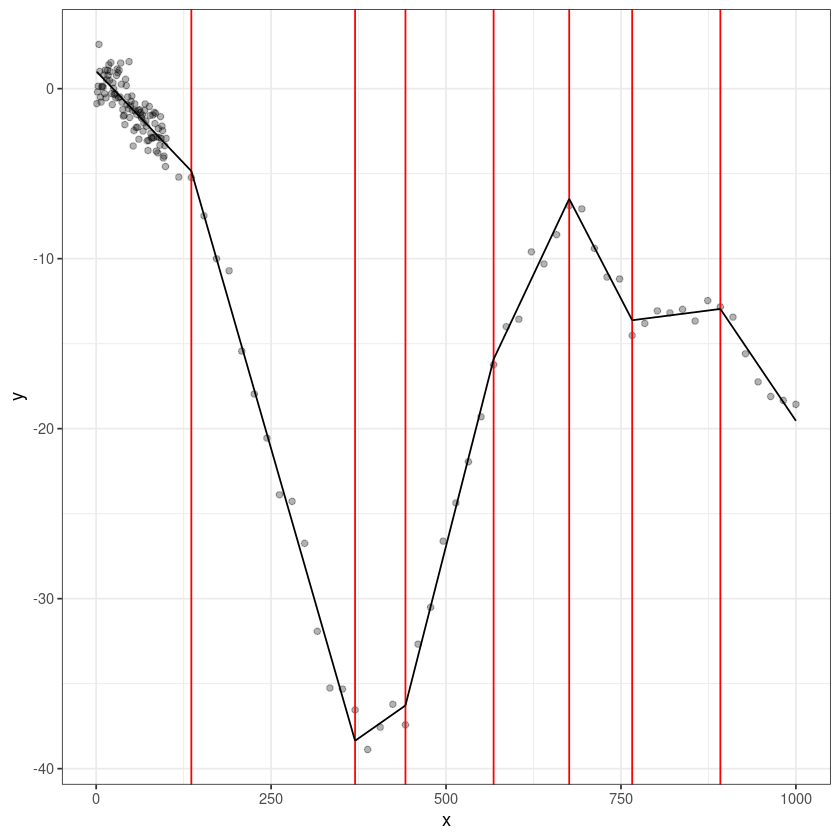

[1]  15 145 345 395 435 595 685 825 875

[1] 136 370 442 568 676 766 892

[1] 140 360 440 570 680 770 880

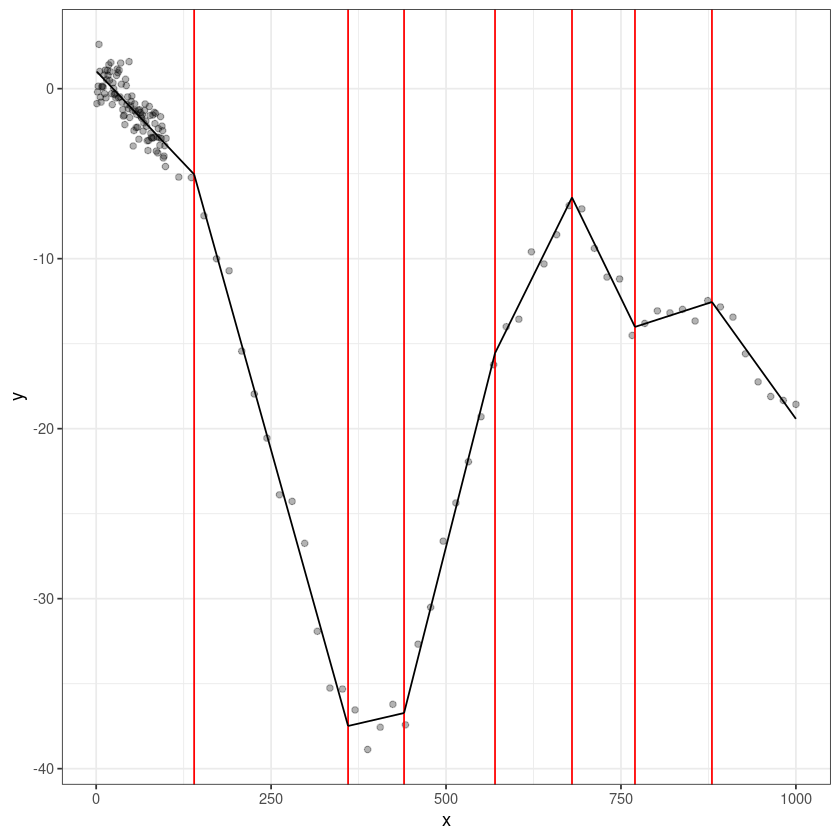

In [27]:
res=cpop(y.sub,x,beta=2*log(length(y.sub))) 
res.grid=cpop(y.sub,x,grid=10*1:100,2*log(100))
plot(res)
plot(res.grid)
sort(cps)
changepoints(res)$location
changepoints(res.grid)$location

In [28]:
help(cpop)

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte